<a href="https://colab.research.google.com/github/kanta-yamano/atc/blob/main/%E5%B8%B8%E5%BE%AE%E5%88%86%E6%96%B9%E7%A8%8B%E5%BC%8F%E3%82%B7%E3%83%9F%E3%83%A5%E3%83%AC%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## シミュレーション

# 常微分方程式による数値シミュレーション
小高「Pythonによる数値計算とシミュレーション」（オーム社）参照 \
plt アニメーション参考サイト： https://yaju3d.hatenablog.jp/entry/2018/07/31/234724

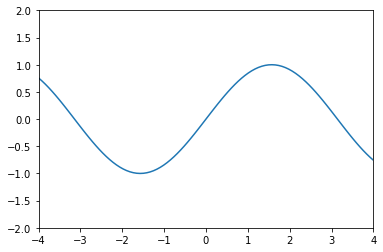

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

# animate over some set of x, y
x = np.linspace(-4, 4, 100)
y = np.sin(x)

# First set up the figure, the axes, and the plot element
fig, ax = plt.subplots() # fig　と ax を生成

ax.set_xlim(( -4, 4))
ax.set_ylim((-2, 2))

ax.plot(x,y)

X軸　－4から4　Y軸　－2.0から2.0 の図示領域を定義し、x, y の値をプロットした。


In [ ]:
# animation function: this is called sequentially
plt.close() # 不要?
line1, = ax.plot([],[], lw=2)
line2, = ax.plot([],[], lw=2)

def init():
  line1.set_data(x,y)
  return(line1,)

def animate(i):
  at_x = x[i]
  # gradient_line will have the form m*x + b
  m = np.cos(at_x)
  b = np.sin(at_x) - np.cos(at_x)*at_x
  gradient_line = m*x + b 
  line2.set_data(x, gradient_line) #x の全領域に渡って　line2 の値を計算する
  return (line2,)

In [ ]:
from matplotlib import animation, rc

In [ ]:
# animate(), init() を定義し、line1, line2 に値を入れた。
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=False)
rc('animation', html='jshtml')
anim

# 電荷シミュレーション

2次元運動のシミュレーションとして、電界中の荷電粒子のシミュレーションを行う。

In [ ]:
# モジュールのインポート
import numpy as np
import matplotlib.pyplot as plt
import math

# 定数
Q = (((0.0, 0.0), 10.0), ((5.0, -5.0), 5.0))  # 電荷の位置と値
TIMELIMIT = 20.0  # シミュレーション打ち切り時刻
RLIMIT = 0.1      # 距離rの最低値
H = 0.01          # 時刻の刻み幅

# メイン実行部
t = 0.0  # 時刻t
# 電荷位置のプロット
# 表示領域の設定
# First set up the figure, the axes, and the plot element
fig, ax = plt.subplots() # fig　と ax を生成

ax.set_xlim(( -4, 9))
ax.set_ylim((-7, 3))

#初期状態の表示として利用する。
for qi in Q:
  plt.plot(qi[0][0], qi[0][1], ".")

In [ ]:
# 投入される粒子の動作係数の入力
vx = -2
vy = 1
x = 2
y = 2

#vx = float(input("初速度v0xを入力してください(例　-2):"))
#vy = float(input("初速度v0yを入力してください（例　1）:"))
#x = float(input("初期位置xを入力してください（例　2）:"))
#y = float(input("初期位置yを入力してください（例　2）:"))
#print("{:.7f} {:.7f} {:.7f} {:.7f} {:.7f}".format(t, x, y, vx, vy))
# 現在時刻と現在の位置

# グラフデータに初期位置を追加
xlist = [x]
ylist = [y]

# 2次元運動の計算
while t < TIMELIMIT:   # 打ち切り時間まで計算
    t = t + H          # 時刻の更新
    rmin=float("inf")  # 距離の最小値を初期化
    for qi in Q:
        rx = qi[0][0] - x  # 距離rxの計算
        ry = qi[0][1] - y  # 距離ryの計算
        r = math.sqrt(rx * rx + ry * ry)    # 距離rの計算
        if r < rmin:
            rmin = r  # 距離の最小値を更新
        vx += (rx / r / r / r * qi[1]) * H  # 速度vxの計算
        vy += (ry / r / r / r * qi[1]) * H  # 速度vyの計算
    x += vx * H  # 位置xの計算
    y += vy * H  # 位置yの計算
    #print("{:.7f} {:.7f} {:.7f} {:.7f} {:.7f}".format(t, x, y, vx, vy))
        # 現在時刻と現在の位置
    # グラフデータに現在位置を追加
    xlist.append(x)
    ylist.append(y)
    if rmin < RLIMIT:
        break  # 電荷に非常に近づいたら終了

軌跡を描画

In [ ]:
for qi in Q:
  plt.plot(qi[0][0], qi[0][1], ".")
plt.plot(xlist,ylist)

NameError: ignored

アニメーションにチャレンジ

In [ ]:
plot1, = ax.plot([],[], lw=2)
plot2, = ax.plot([],[], lw=2)

def particle_animate(i):
  tmp_x = xlist[:i] 
  tmp_y = ylist[:i]
  plot2.set_data(tmp_x,tmp_y)
  return(plot2,)

以下の動画の作成には、数分かかります。

In [ ]:
# グラフの表示
anim = animation.FuncAnimation(fig, particle_animate, frames=2000, interval=1000, blit=False)
rc('animation', html='jshtml')
anim